In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [ ]:
df = pd.read_csv('Customer churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#replacing blanks with 0 as tenure is 0 and no total charges are recorded


In [ ]:
df["TotalCharges"] = df["TotalCharges"].replace(" ","0")
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
df.isnull().sum().sum()

np.int64(0)

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [ ]:
df["customerID"].duplicated().sum()

np.int64(0)

#converted 0 and 1 values of senior citizen toyes?no to make it easier to understand.

In [ ]:
def conv(value):
  if value == 1:
    return "yes"
  else:
    return "no"

df['SeniorCitizen'] = df["SeniorCitizen"].apply(conv)

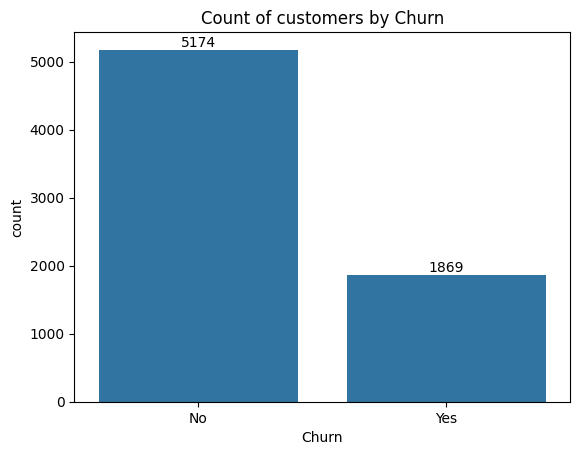

In [43]:
ax = sns.countplot(x = 'Churn' , data= df)
ax.bar_label(ax.containers[0])
plt.title("Count of customers by Churn")
plt.show()

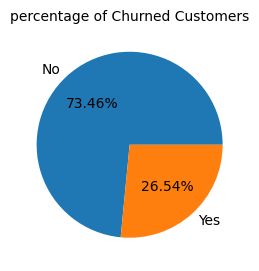

In [46]:
plt.figure(figsize = (3,4))
gb = df.groupby("Churn").agg({'Churn':"count"})
plt.pie(gb['Churn'], labels = gb.index, autopct = "%1.2f%%")
plt.title("percentage of Churned Customers",fontsize=10)
plt.show()

#from the given pie chart we can conclude that 26.54% of our customers have churned out
#not let's explore the reason behind it

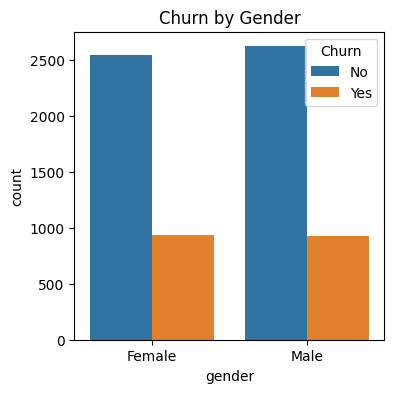

In [54]:
plt.figure(figsize=(4,4))
sns.countplot(x='gender', data = df, hue ="Churn")
plt.title("Churn by Gender")
plt.show()

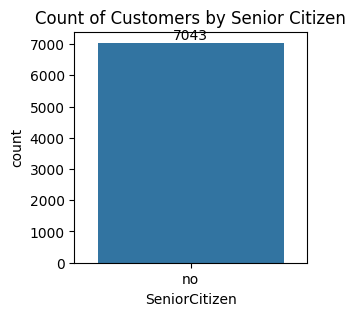

In [73]:
plt.figure(figsize=(3,3))
ax=sns.countplot(x= "SeniorCitizen", data = df)
ax.bar_label(ax.containers[0])

plt.title("Count of Customers by Senior Citizen")
plt.show()

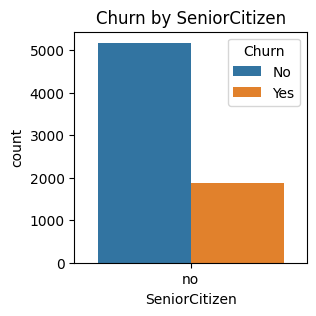

In [71]:
plt.figure(figsize=(3,3))
sns.countplot(x="SeniorCitizen", data = df, hue ="Churn")
plt.title("Churn by SeniorCitizen")
plt.show()

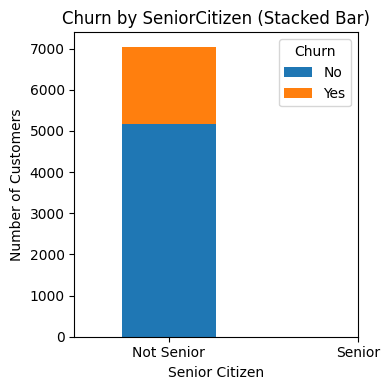

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a cross-tabulation (contingency table)
churn_data = pd.crosstab(df['SeniorCitizen'], df['Churn'])

# Plot the stacked bar chart
churn_data.plot(kind='bar', stacked=True, figsize=(4,4))

# Add labels and title
plt.title("Churn by SeniorCitizen (Stacked Bar)")
plt.xlabel("Senior Citizen")
plt.ylabel("Number of Customers")
plt.xticks([0, 1], ['Not Senior', 'Senior'], rotation=0)
plt.legend(title='Churn')
plt.tight_layout()
plt.show()

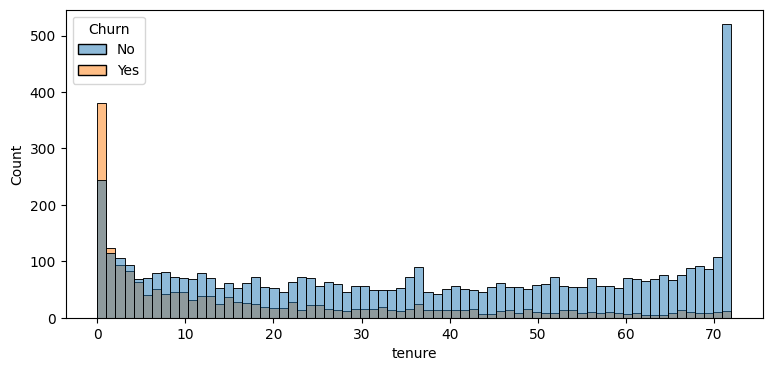

In [67]:
plt.figure(figsize=(9,4))
sns.histplot(x = "tenure", data = df, bins=70, hue ="Churn")
plt.show()

#people who are have used our services for a long time have stayed and people who have used our services
# 1 or 2 months have churned

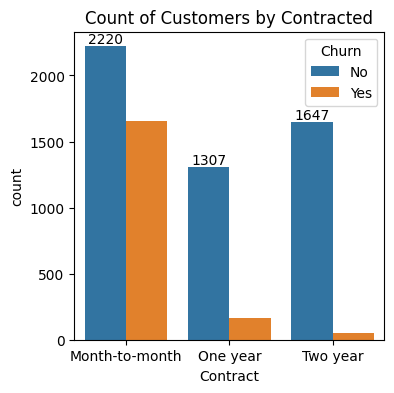

In [72]:
plt.figure(figsize=(4,4))
ax=sns.countplot(x= "Contract", data = df , hue = 'Churn')
ax.bar_label(ax.containers[0])

plt.title("Count of Customers by Contracted")
plt.show()

#people who have to month contract are likely to churn then from those who have 1 or 2 years or contract

In [76]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

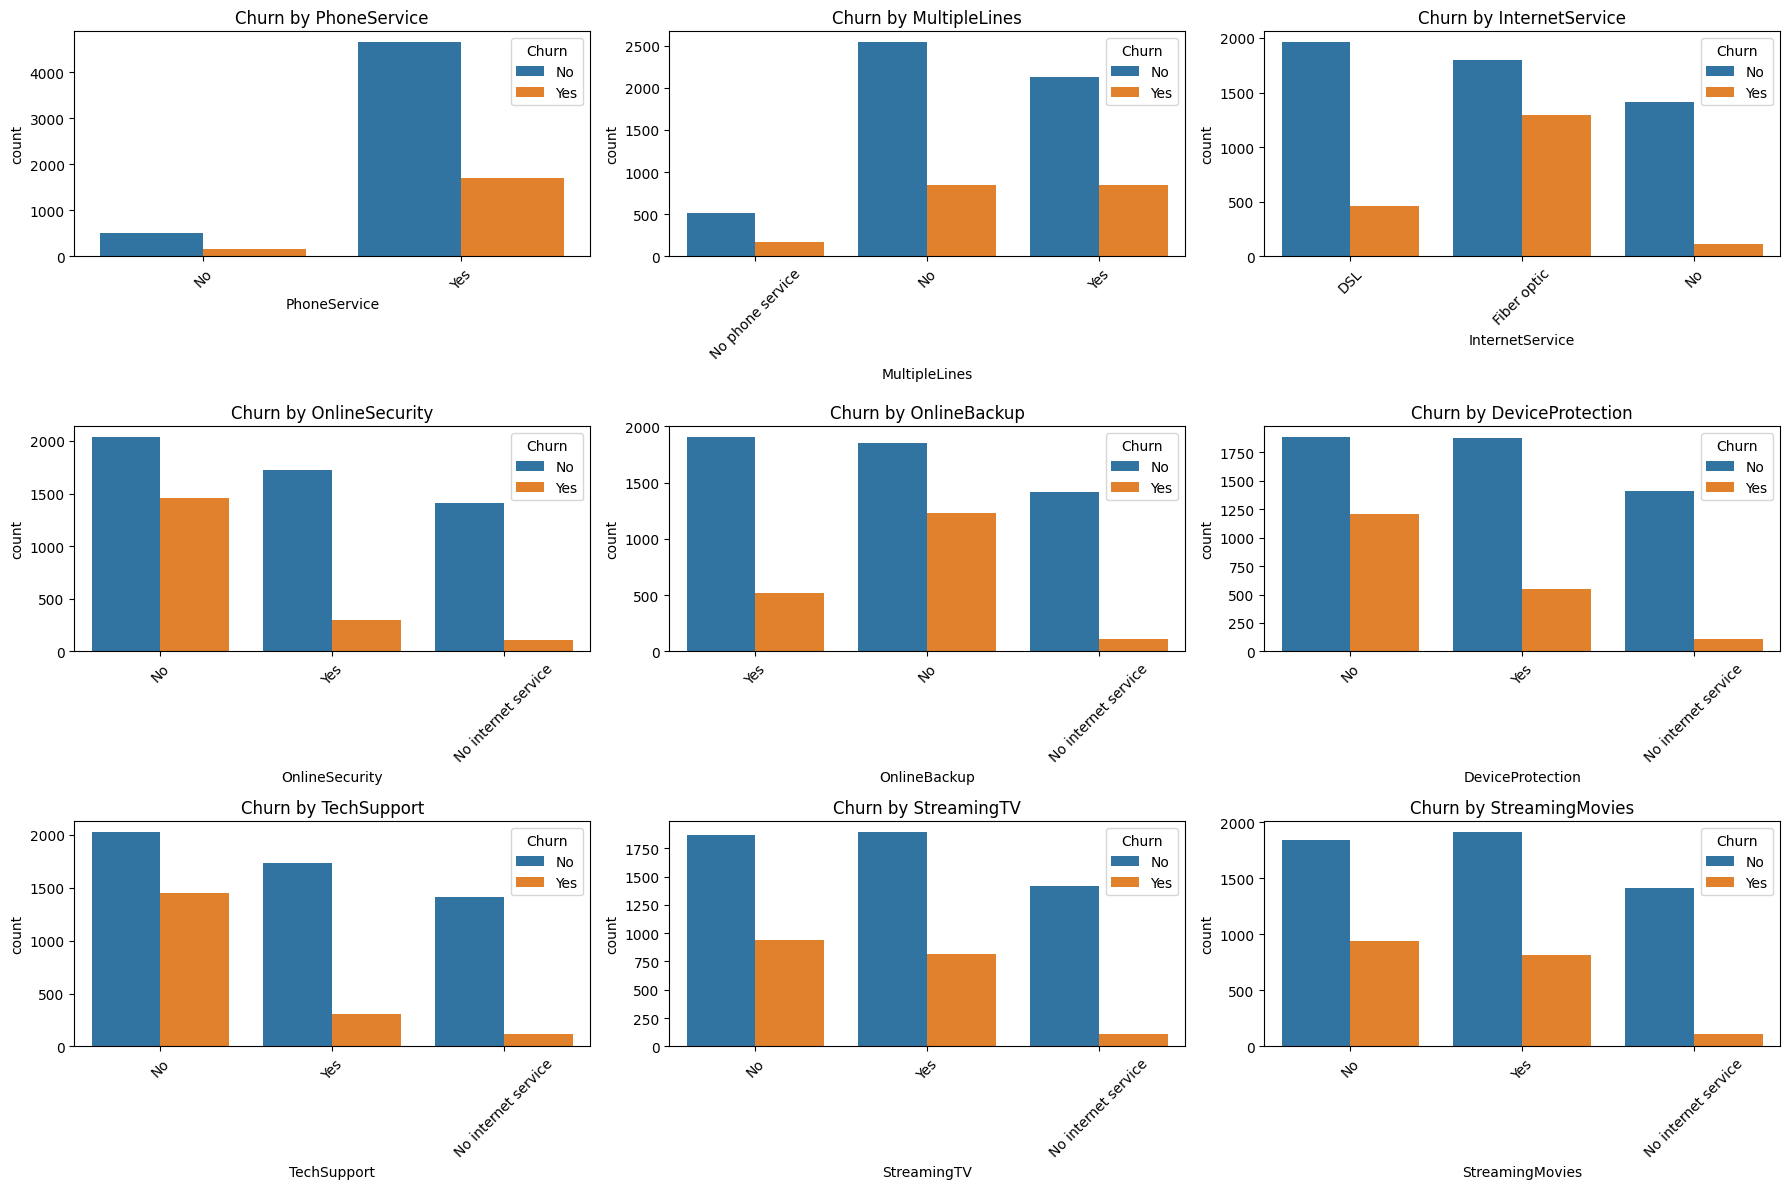

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define features
features = ['PhoneService', 'MultipleLines', 'InternetService',
            'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
            'TechSupport', 'StreamingTV', 'StreamingMovies']

# Define custom blue and orange color palette
# Make sure your 'Churn' column has values exactly as 'No' and 'Yes'
custom_palette = {'No': '#1f77b4', 'Yes': '#ff7f0e'}  # blue and orange

# Set number of rows and columns for subplots
n_rows = 3
n_cols = 3

# Create figure and axes
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 12))
axes = axes.flatten()

# Create countplots
for i, feature in enumerate(features):
    sns.countplot(x=feature, hue='Churn', data=df, ax=axes[i], palette=custom_palette)
    axes[i].set_title(f'Churn by {feature}')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].legend(title='Churn')

# Adjust layout
plt.tight_layout()
plt.show()


#The countplot subplots display customer churn distribution across nine service-related features. In most categories, customers without services like online security, tech support, and backup show higher churn rates (more orange bars). Non-churning customers (blue bars) dominate among those with active services. The plots clearly highlight that lacking add-on services correlates with a higher likelihood of churn.











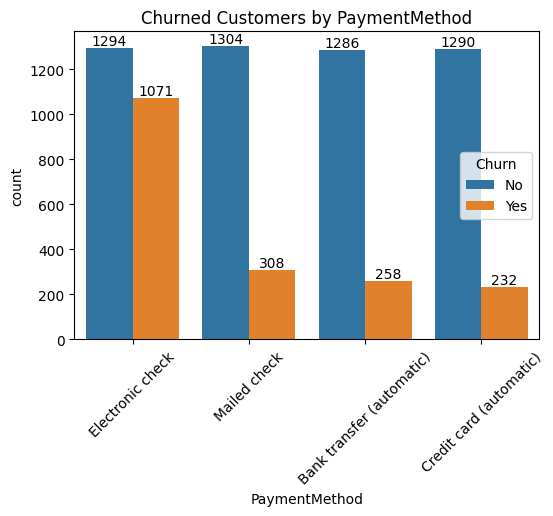

In [90]:
plt.figure(figsize=(6,4))
ax=sns.countplot(x= "PaymentMethod", data = df , hue = 'Churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

plt.title("Churned Customers by PaymentMethod")
plt.xticks(rotation=45)
plt.show()

#customer is likely to churn when he is using electronic check as a payment method